# Machine Learning with sklearn

''Machine learning is a rapidly growing field of study that involves the development of algorithms and statistical models that enable computers to learn from data and make predictions or decisions without being explicitly programmed. Machine learning techniques are increasingly being used in a variety of applications, from image and speech recognition to natural language processing and autonomous vehicles. As a statistics student, you already have a strong foundation in data analysis and statistical inference, which are crucial skills in machine learning. Through the study of machine learning, you can gain a deeper understanding of how to model complex data and extract useful insights from it, as well as how to design and evaluate algorithms that can learn from this data.''

**Note:** this is an introduction lecture on machine learning without exercises or assignments. 

**Key points:** *algorithms, statistical models, not explicitly programmed, statistical inference*

**Learning goals:**

- Gain knowledge about the basic capabilities of Python modules `Scikit-learn` and `Keras`
- Apply simple regression and classification methods.

**Python libraries**

- [scikit-learn](https://scikit-learn.org/stable/index.html) 
    - preprocessing
    - classification
    - regression
    - clustering
    - dimensionality reduction
    - model selection
    - etc. 
- [Keras](https://keras.io/)
    - Demo : simple neural network
      

### Typical steps in a ML method from sklearn:


* Provide data
* Pre-processing of the data
* Create a model
* Fit a model
* Make predictions
* Define evaluation metric
* **Cross-validation!**


## Linear regression with scikit-learn (sklearn)
Linear regression is a statistical method for modeling the relationship between a dependent variable and one or more independent variables by fitting a linear equation. The output values are continous

In [28]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression

#### Generate/load data

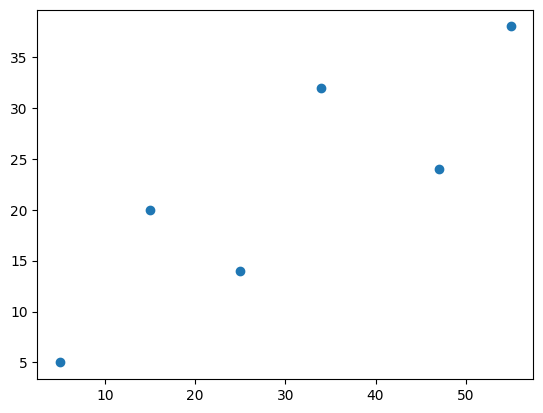

In [29]:
x = np.array([5, 15, 25, 34, 47, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 24, 38])

plt.scatter(x,y)
plt.show()

In [30]:
print(x.shape, y.shape)

(6, 1) (6,)


#### Create a model
This is the typical instance where you can create a model using sklearn.

In [31]:
model = LinearRegression()

#### Fit a model
The trained model corresponds to the estimator that minimizes the loss function (e.g. mean squared error) between the predicted and the true target values on the training data. 

In [32]:
model.fit(x, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
model = LinearRegression().fit(x, y)

Return the coefficient of determination of the prediction $R^2$.

In [34]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.7255090758067395


In [35]:
print(f"intercept: {model.intercept_}")

intercept: 5.973220057253666


slope: [0.53679934]


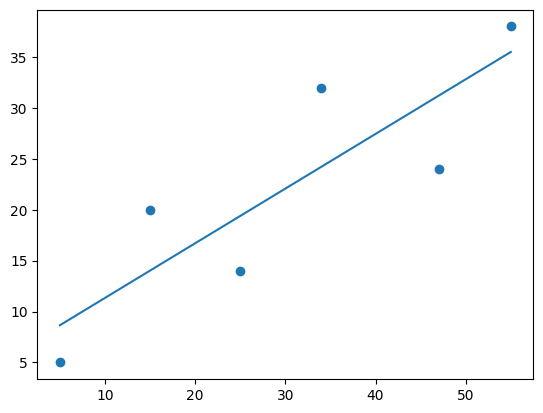

In [36]:
print(f"slope: {model.coef_}")
y_pred = model.predict(x)
y_pred = model.intercept_ + model.coef_ * x
plt.plot(x,y_pred)
plt.scatter(x,y)
plt.show()

#### Let's try a new data set

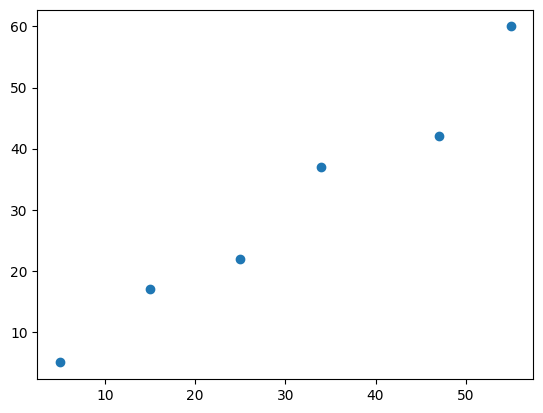

In [37]:
x = np.array([5, 15, 25, 34, 47, 55]).reshape((-1, 1))
y = np.array([5,17,22,37,42,60])

plt.scatter(x,y)
plt.show()

In [38]:
model = LinearRegression().fit(x, y)
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.9637915260408423


#### Make predictions

In [39]:
print(f"predicted response:\n{y_pred}")

predicted response:
[[ 8.65721673]
 [14.02521008]
 [19.39320344]
 [24.22439745]
 [31.20278881]
 [35.49718349]]


#### Let's plot our new model!

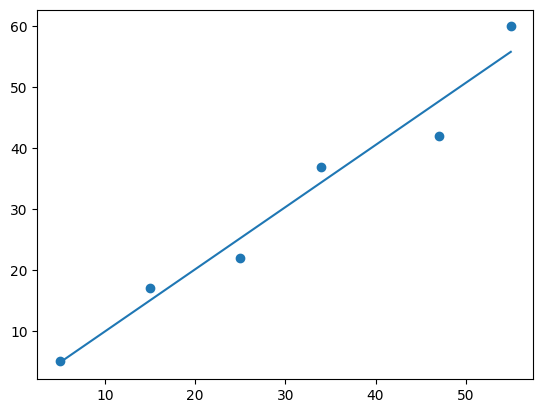

In [40]:
y_pred = model.predict(x)
y_pred = model.intercept_ + model.coef_ * x
plt.plot(x,y_pred)
plt.scatter(x,y)
plt.show()

##### (What about error bars? soon...)

## Polynomial fit
To fit a polynomial regression with python, there are two functions available. The package numpy provides polyfit, and the package scikit-learn uses PolynomialFeatures combined with LinearRegression. We will compare them and in practice, we will notice one major difference.

In [41]:
from sklearn.preprocessing import PolynomialFeatures

In [42]:
transformer = PolynomialFeatures(degree=2, include_bias=False)

In [43]:
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x)

In [44]:
x_

array([[   5.,   25.],
       [  15.,  225.],
       [  25.,  625.],
       [  34., 1156.],
       [  47., 2209.],
       [  55., 3025.]])

In [45]:
model = LinearRegression().fit(x_, y)

In [46]:
r_sq = model.score(x_, y)
intercept, coefficients = model.intercept_, model.coef_

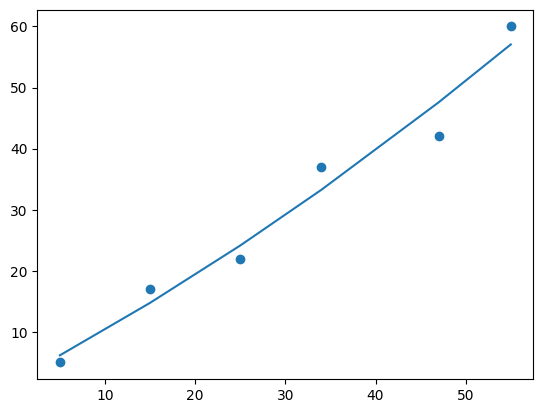

In [47]:
y_pred = model.predict(x_)
plt.plot(x,y_pred)
plt.scatter(x,y)
plt.show()

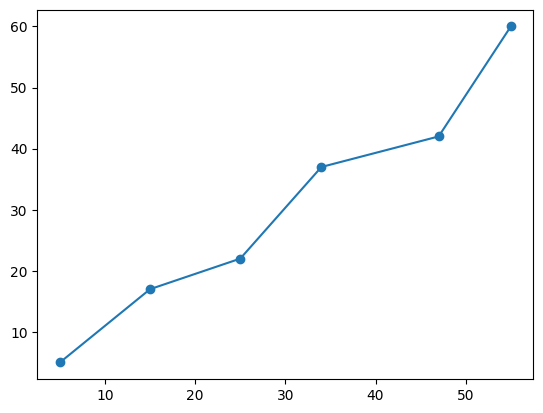

In [48]:
x_ = PolynomialFeatures(degree=5, include_bias=False).fit_transform(x)
model = LinearRegression().fit(x_, y)
y_pred = model.predict(x_)
plt.plot(x,y_pred)
plt.scatter(x,y)
plt.show()

### Now imagine I make another measurement in the data and add a new point 

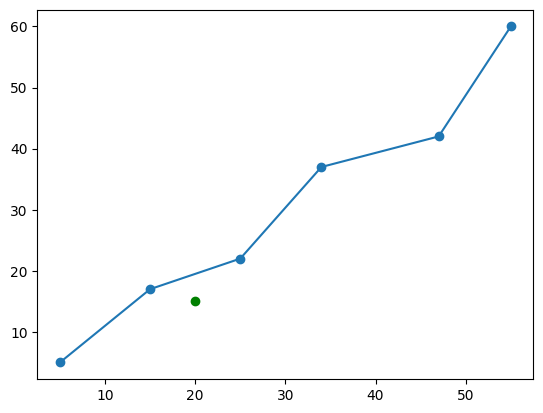

In [49]:
y_pred = model.predict(x_)
plt.plot(x,y_pred)
plt.scatter(x,y)
plt.scatter([20],[15],c='green')
plt.show()

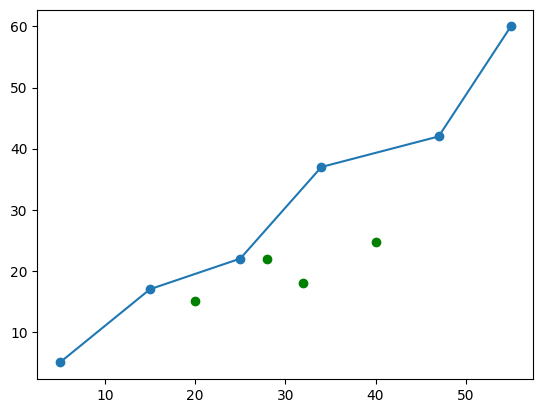

In [50]:
plt.plot(x,y_pred)
plt.scatter(x,y)
plt.scatter([20,28,32,40],[15,22,18,24.7],c='green')
plt.show()

## Overfitting (and under fitting)

### 1) Train test validation split

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=42)
x_train

array([[25],
       [47],
       [34]])

In [52]:
x_test

array([[ 5],
       [15],
       [55]])

### 2) Regularisation techniques

Regularization is a technique used in machine learning to prevent overfitting, which occurs when a model learns the training data too well—including its noise—resulting in poor performance on unseen data. Regularization adds a penalty to the loss function to discourage complex models. Regularization helps build models that generalize better, improving reliability on new data.

## Ridge regression
The Ridge() function has an alpha argument (λ, but with a different name!) that is used to tune the model. 

In [53]:
from sklearn.datasets import make_regression
from sklearn.linear_model import ridge_regression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [54]:
rng = np.random.RandomState(10)
X_train = rng.randn(100, 4)
X_test=rng.randn(20, 4)

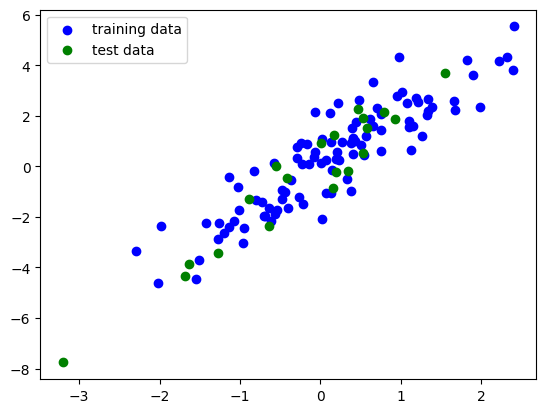

In [55]:
y_train = 2.0 * X_train[:, 0] - 1.0 * X_train[:, 1] + 0.1 * rng.standard_normal(100)
y_test = 2.0 * X_test[:, 0] - 1.0 * X_test[:, 1] + 0.1 * rng.standard_normal(20)

plt.scatter(X_train[:,0],y_train,c='blue',label='training data')
plt.scatter(X_test[:,0],y_test,c='green',label='test data')
plt.legend()
plt.show()

In [56]:
## again, this is how you start defining your model
model = Ridge()

model.set_params(alpha = 10)
model.fit(X_train, y_train)
print(model.coef_)

[ 1.80567642 -0.86460166  0.01469971  0.01698441]


In [57]:
pred2 = model.predict(X_test) 
print(mean_squared_error(y_test, pred2)) 

0.11703473496580641


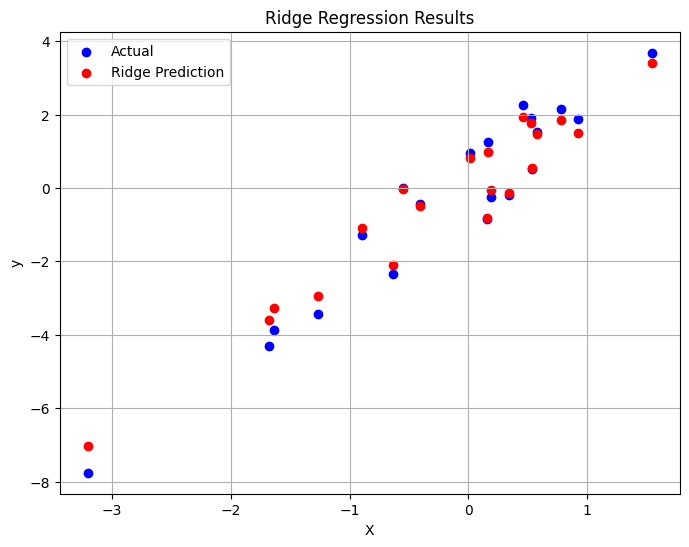

In [58]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:,0], y_test, color="blue", label="Actual")
plt.scatter(X_test[:,0], pred2, color="red", linewidth=1, label="Ridge Prediction")
plt.title("Ridge Regression Results")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


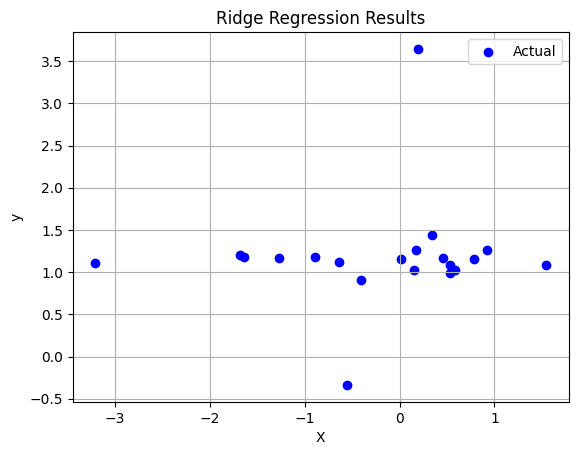

In [59]:
plt.scatter(X_test[:,0], y_test/pred2, color="blue", label="Actual")
plt.title("Ridge Regression Results")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

## Multi dimensional regression
Multi-dimensional regression searches for relationships among variables. For example, you can observe several employees of some company and try to understand how their salaries depend on their features, such as experience, education level, role, city of employment, and so on.

This is a regression problem where data related to each employee represents one observation. The presumption is that the experience, education, role, and city are the independent features, while the salary depends on them.

In [60]:
## complexity
## Random Forest Regression
### Neural Network Regression

## Classification

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

Lets use as example the Iris data set. This is one of the earliest datasets used in the literature on classification methods and widely used in statistics and machine learning.  The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.  One class is linearly separable from the other 2; the latter are not linearly separable from each other.

Predicted attribute: class of iris plant.


In [62]:
iris = pd.read_csv('iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [63]:
iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## -->> Always visualize your data!

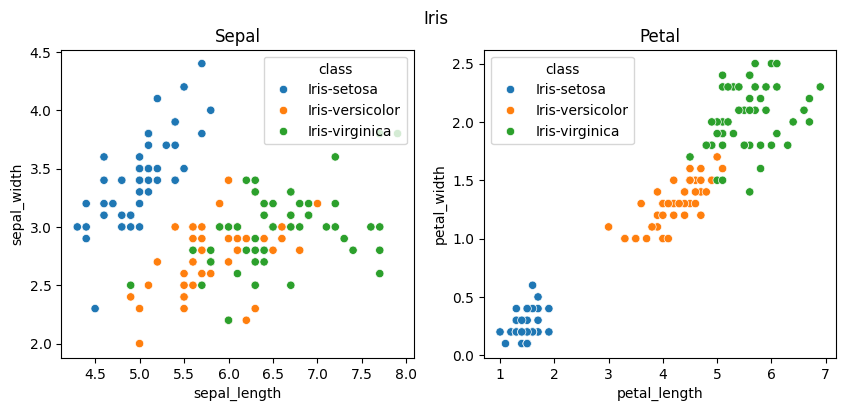

In [64]:
fig, axes = plt.subplots(1,2,figsize=(10,4))
fig.suptitle("Iris")
axes[0].set_title("Sepal")
axes[1].set_title("Petal")
sb.scatterplot(iris, x='sepal_length', y='sepal_width', hue='class',ax=axes[0])
sb.scatterplot(iris, x='petal_length', y='petal_width', hue='class',ax=axes[1]);

### Supervisied classifier

In [65]:
features = iris.columns.drop('class')
target = 'class'
X, Y = iris[features], iris[target]

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.40, random_state=42) ## random state due to shuffling

In [67]:
list(map(lambda x : x.shape , [x_train, x_test, y_train, y_test])) 

[(90, 4), (60, 4), (90,), (60,)]

#### Label encoder

We need numerical values for the response variable `class`. We can roughly mimic R factors using the Scikit Learn `LabelEncoder` class. The `LabelEncoder` encodes the labels of the target variable with values from the range [0, number of classes -1]. Since our target value has three species of Iris, we'd expect to have the numerical values 0, 1 and 2 after encoding:

In [68]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  # class instance
le.fit(y_train);

In [69]:
le.transform(y_train)

array([2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0, 1, 2, 0,
       0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 0, 1,
       2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 1,
       2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2, 1, 1, 2, 2, 0, 1, 2, 0,
       1, 2])

We then apply the method `.transform()` on `y_train` and `y_test` separately.

In [70]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

#### Feature standardisation
In order to perform properly some multivariate models require `standardisation` of the features. The standard score $z = (x-\mu)/\sigma$, where $x$ is a feature, $\mu$ the mean and $\sigma$ the standard deviation of the training samples. The class `StandardScaler` performs standardisation of all features of the dataset in a one run.

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_st = scaler.transform(x_train)
x_test_st = scaler.transform(x_test)

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_st = scaler.transform(x_train)
x_test_st = scaler.transform(x_test)

## SVM

https://scikit-learn.org/stable/modules/svm.html

In [73]:
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

clf = svm.SVC()
clf.fit(x_train_st, y_train)
y_pred = clf.predict(x_test_st)

In [74]:
accuracy_score(y_pred,y_test)

0.9833333333333333

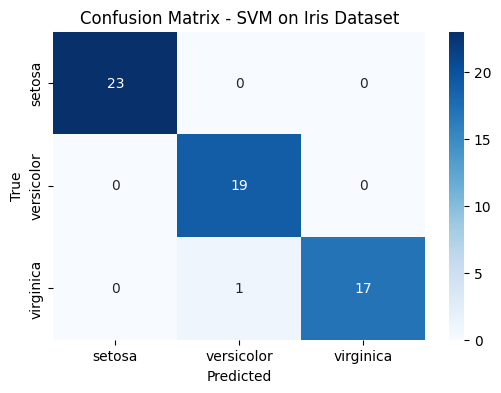

In [75]:
from sklearn import datasets
iris = datasets.load_iris()
class_names = iris.target_names

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - SVM on Iris Dataset')
plt.show()


In [76]:
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        23
  versicolor       0.95      1.00      0.97        19
   virginica       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



## Decision Trees classifier

It is a tree-structured classifier with three types of nodes. The Root Node is the initial node which represents the entire sample and may get split further into further nodes. The Interior Nodes represent the features of a data set and the branches represent the decision rules. Finally, the Leaf Nodes represent the outcome. This algorithm is very useful for solving decision-related problems.

In [77]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [78]:
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
clf.fit(x_train_st, y_train)
y_pred = clf.predict(x_test_st)

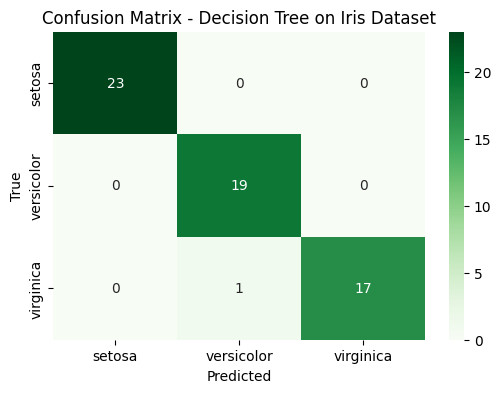

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        23
  versicolor       0.95      1.00      0.97        19
   virginica       1.00      0.94      0.97        18

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



In [79]:
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Decision Tree on Iris Dataset")
plt.show()

# Classification report
print(classification_report(y_test, y_pred, target_names=class_names))


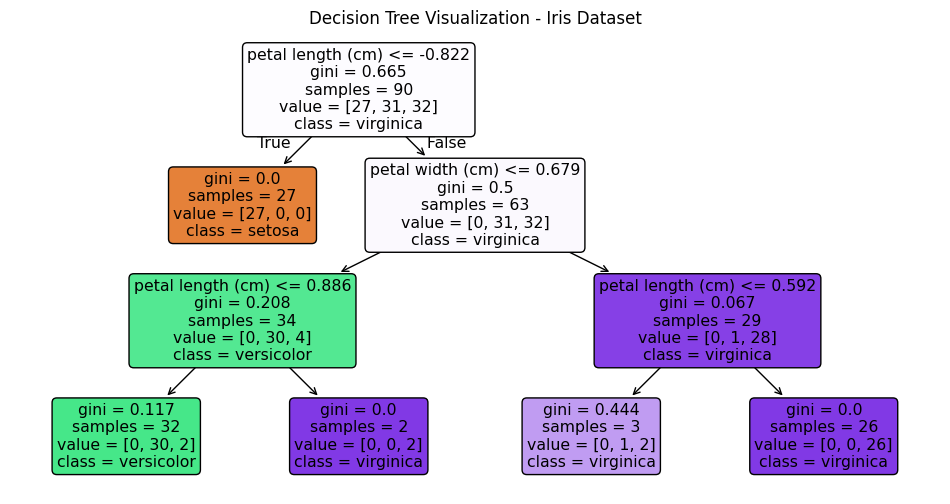

In [ ]:
plt.figure(figsize=(12, 6))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=class_names, rounded=True)
plt.title("Decision Tree Visualization - Iris Dataset")
plt.show()